#  Factors Influencing Student Academic Performance
## by Gurps Rai

## Investigation Overview

In this investigation, I set out to understand which factors, for example; wealth, country of residence, gender, truancy, possession of textbooks etc., could be used from the Pisa 2012 dataset, to predict student academic performance.

## Dataset Overview

The Pisa assessment focuses on reading, mathematics, science, and problem solving, along with a whole host of other matrices, that are deemed to have an effect on educational achievement.

The complete Pisa dataset consisted of 636 separate features, for over 485K students.
I decided to try and understand how some of these features in the dataset may influence student academic performance, of the three main subject disciplines which are included in the Pisa dataset; Mathematics, Reading and Science.  
The factors I decided to focus on were:
-	Country of student
-	Wealth of student’s family
-	Gender
-	OECD membership of country
-	Truancy 
-	Immigration status
-	Student possession of textbooks


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# load dataset into pandas dataframe, using latin-1 encoding
df = pd.read_csv('pisa2012.csv',sep=',', encoding='latin-1',error_bad_lines=False, index_col=False, dtype='unicode')

In [3]:
# create list of the required column names
reqd_columns = ['CNT', 'OECD','ST04Q01','ST09Q01','ST26Q10','IMMIG','WEALTH','PV1MATH','PV2MATH',
                'PV3MATH','PV4MATH','PV5MATH','PV1READ','PV2READ','PV3READ','PV4READ','PV5READ',
                'PV1SCIE','PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE']

# re-construct DF with only the required columns 
df = df[reqd_columns]

# construct dictionary (col_name_dict) of original column names and new readable names - without spaces
col_name_dict = {
    'CNT':'Country',
    'OECD': 'OECD_Membership',
    'ST04Q01':'Gender',
    'ST09Q01':'Truancy',
    'ST26Q10':'Has_Textbooks',
    'IMMIG': 'Immigration_Status',
    'WEALTH': 'Wealth',
    'PV1MATH': 'Maths_P_Value1',
    'PV2MATH': 'Maths_P_Value2',
    'PV3MATH': 'Maths_P_Value3',
    'PV4MATH': 'Maths_P_Value4',
    'PV5MATH': 'Maths_P_Value5',
    'PV1READ': 'Reading_P_Value1',
    'PV2READ': 'Reading_P_Value2',
    'PV3READ': 'Reading_P_Value3',
    'PV4READ': 'Reading_P_Value4',
    'PV5READ': 'Reading_P_Value5',
    'PV1SCIE': 'Science_P_Value1',
    'PV2SCIE': 'Science_P_Value2',
    'PV3SCIE': 'Science_P_Value3',
    'PV4SCIE': 'Science_P_Value4',
    'PV5SCIE': 'Science_P_Value5'
}

# rename column values using col_name_dict
df.rename(columns = col_name_dict, inplace =True)

# change data types to appropriate types
df = df.astype({"Wealth":float, "Maths_P_Value1": float, "Maths_P_Value2": float,"Maths_P_Value3": float, 
                "Maths_P_Value4": float, "Maths_P_Value5": float, "Reading_P_Value1": float, 
                "Reading_P_Value2": float, "Reading_P_Value3": float, "Reading_P_Value4": float, 
                "Reading_P_Value5": float, "Science_P_Value1": float, "Science_P_Value2": float, 
                "Science_P_Value3": float, "Science_P_Value4": float, "Science_P_Value5": float,
               })

# add new columns of the mean maths, reading and science scores respectively

df['Mean_Maths_Score'] = (df.Maths_P_Value1 + df.Maths_P_Value2 + df.Maths_P_Value3 + df.Maths_P_Value4 + df.Maths_P_Value5) / 5
df['Mean_Reading_Score'] = (df.Reading_P_Value1 + df.Reading_P_Value2 + df.Reading_P_Value3 + df.Reading_P_Value4 + df.Reading_P_Value5) / 5
df['Mean_Science_Score'] = (df.Science_P_Value1 + df.Science_P_Value2 + df.Science_P_Value3 + df.Science_P_Value4 + df.Science_P_Value5) / 5

# drop all now redundant P_Value columns
df.drop(columns=['Maths_P_Value1',
                 'Maths_P_Value2',
                 'Maths_P_Value3',
                 'Maths_P_Value4',
                 'Maths_P_Value5',
                 'Reading_P_Value1',
                 'Reading_P_Value2',
                 'Reading_P_Value3',
                 'Reading_P_Value4',
                 'Reading_P_Value5',
                 'Science_P_Value1',
                 'Science_P_Value2',
                 'Science_P_Value3',
                 'Science_P_Value4',
                 'Science_P_Value5'], inplace = True)



## Distribution of Student Scores for Mathematics, Reading and Science Scores

The three main scores are all very well 'normally' distributed and indicate the Pisa tests were of excellent technical quality, and the results are likely to be reliable indictors of student academic performance for each of the three subjects.

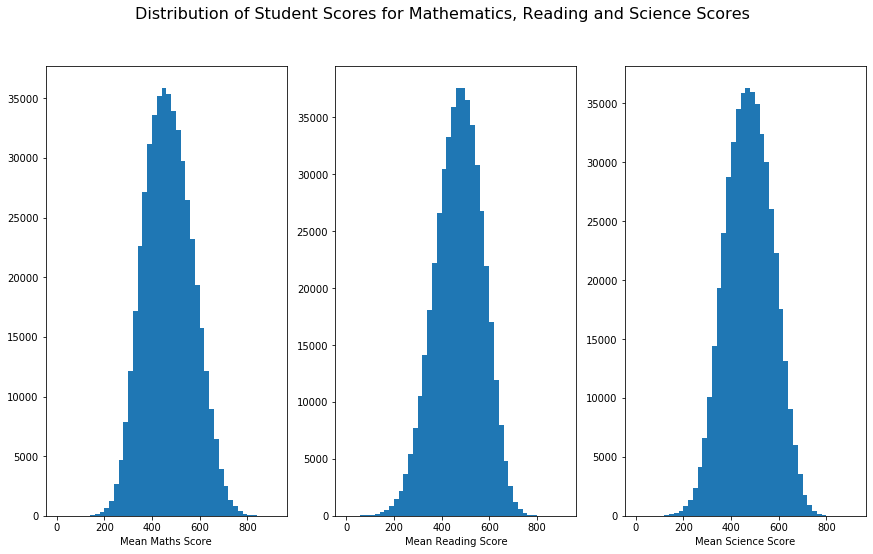

In [4]:
# set plot size and main title
fig = plt.figure(figsize=[14.70, 8.27])
fig.suptitle('Distribution of Student Scores for Mathematics, Reading and Science Scores', fontsize=16)

# set bin edges the same for all three plots, as they have similar statistics - 
bin_edges = np.arange(0, 905+20, 20)

# plot the three mean scores using distplot
plt.subplot(1,3,1)
sb.distplot(df.Mean_Maths_Score, bins = bin_edges, kde = False, hist_kws = {'alpha':1})
plt.xlabel('Mean Maths Score')

plt.subplot(1,3,2)
sb.distplot(df.Mean_Reading_Score, bins = bin_edges, kde = False, hist_kws = {'alpha':1})
plt.xlabel('Mean Reading Score')

plt.subplot(1,3,3)
sb.distplot(df.Mean_Science_Score, bins = bin_edges, kde = False, hist_kws = {'alpha':1})
plt.xlabel('Mean Science Score');

## Kernel Density Comparison of Gender vs Mathematics, Reading and Science Scores

There some interesting correlations between gender and the three subject scores. Female students seem to do a lot better on the reading scores than male students, this is seen to be true across the whole range of data, as seen on the KDE curves – where the female distribution curve is completely offset to higher score levels. 
Male students seem to do slightly better than female students in the upper band of scores in mathematics and science (though also slightly worse in the lower range of scores in science), however, female students are more likely to achieve average score across all three subjects – i.e. they have less variance across the scores.

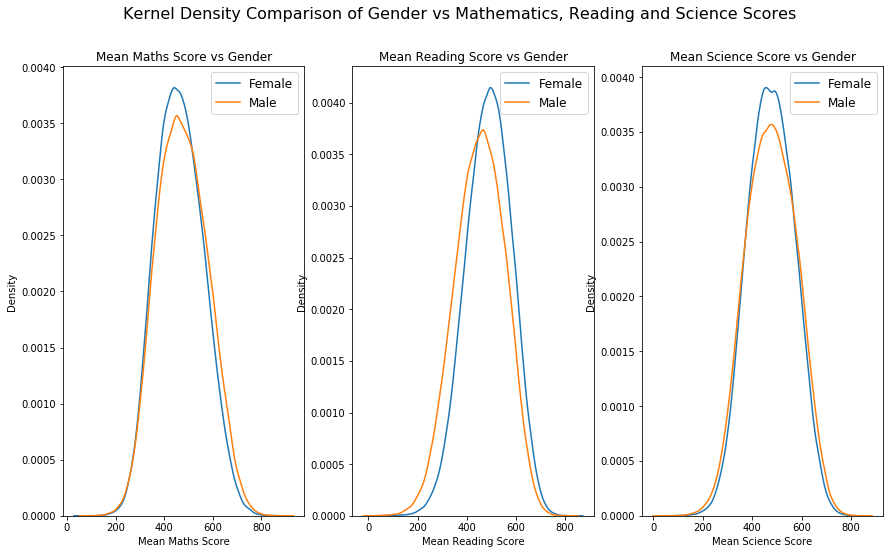

In [5]:
# Overlaid Kernel density curves of distributions for each gender against the 
# the three mean scores - Maths, Science and Reading
fig = plt.figure(figsize=[14.70, 8.27])
fig.suptitle('Kernel Density Comparison of Gender vs Mathematics, Reading and Science Scores', fontsize=16)

plt.subplot(1,3,1)
df1 = df[df.Gender == 'Female']
sb.distplot(df1['Mean_Maths_Score'], hist = False, kde = True,  label='Female')
df1 = df[df.Gender == 'Male']
sb.distplot(df1['Mean_Maths_Score'], hist = False, kde = True, label='Male')
# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Mean Maths Score vs Gender')
plt.xlabel('Mean Maths Score')
plt.ylabel('Density')

plt.subplot(1,3,2)
df1 = df[df.Gender == 'Female']
sb.distplot(df1['Mean_Reading_Score'], hist = False, kde = True,  label='Female')
df1 = df[df.Gender == 'Male']
sb.distplot(df1['Mean_Reading_Score'], hist = False, kde = True, label='Male')
# formatting
plt.legend(prop={'size': 12})
plt.title('Mean Reading Score vs Gender')
plt.xlabel('Mean Reading Score')
plt.ylabel('Density')

plt.subplot(1,3,3)
df1 = df[df.Gender == 'Female']
sb.distplot(df1['Mean_Science_Score'], hist = False, kde = True,  label='Female')
df1 = df[df.Gender == 'Male']
sb.distplot(df1['Mean_Science_Score'], hist = False, kde = True, label='Male')
# formatting
plt.legend(prop={'size': 12})
plt.title('Mean Science Score vs Gender')
plt.xlabel('Mean Science Score')
plt.ylabel('Density');

## Student Have Textbooks? vs Mathematics, Reading and Science Scores

There is no doubting the correlation between students having textbooks and the scores they achieved. Those students in possession of textbooks scored higher results for all three subjects. This affect is clearly seen in the mean and interquartile range of the violin plots.

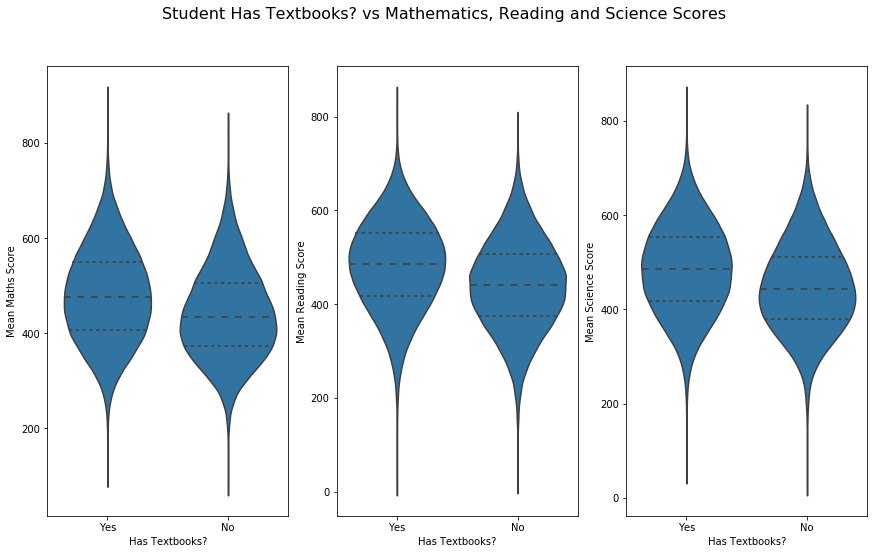

In [6]:
# violin subplots - if students have textbooks vs mean scores of Maths, Science and Reading

fig = plt.figure(figsize=[14.70, 8.27])
fig.suptitle('Student Has Textbooks? vs Mathematics, Reading and Science Scores', fontsize=16)
base_colour = sb.color_palette()[0]

plt.subplot(1,3,1)
sb.violinplot(data=df, x='Has_Textbooks', y='Mean_Maths_Score', color = base_colour, inner= 'quartile')
plt.xlabel('Has Textbooks?')
plt.ylabel('Mean Maths Score')

plt.subplot(1,3,2)
sb.violinplot(data=df, x='Has_Textbooks', y='Mean_Reading_Score', color = base_colour, inner= 'quartile')
plt.xlabel('Has Textbooks?')
plt.ylabel('Mean Reading Score')

plt.subplot(1,3,3)
sb.violinplot(data=df, x='Has_Textbooks', y='Mean_Science_Score', color = base_colour, inner= 'quartile')
plt.xlabel('Has Textbooks?')
plt.ylabel('Mean Science Score');

## OECD Country Membership vs  Mathematics, Reading and Science Scores
There is a clear correlation between students of OECD member countries and their scores. Students of OECD member countries achieve much higher scores for each of the three subjects shown here. This effect is clearly seen throughout the ranges depicted by the boxplots.

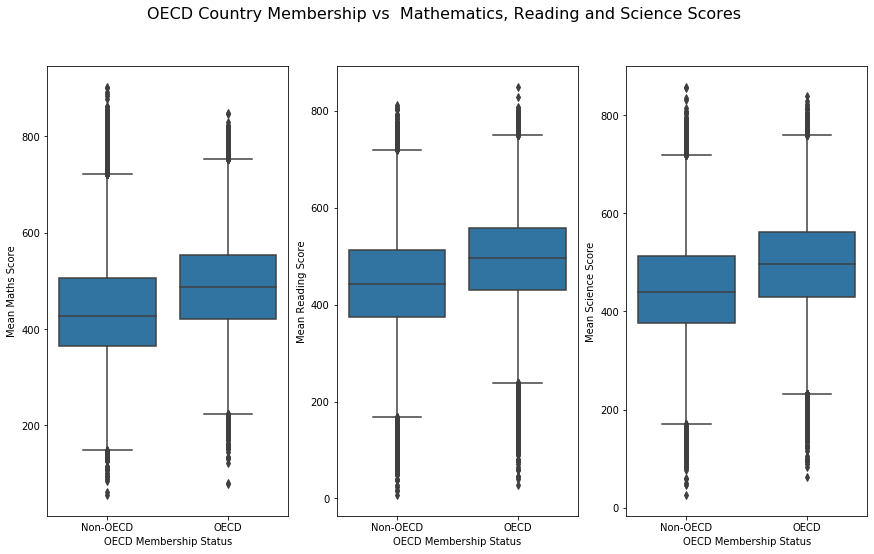

In [7]:
# boxplot subplots of OECD country membership status vs mean scores - Maths, Science and Reading

fig = plt.figure(figsize=[14.70, 8.27])
fig.suptitle('OECD Country Membership vs  Mathematics, Reading and Science Scores', fontsize=16)

plt.subplot(1,3,1)
sb.boxplot(data=df, x='OECD_Membership', y='Mean_Maths_Score', color = base_colour)
plt.xlabel('OECD Membership Status')
plt.ylabel('Mean Maths Score')

plt.subplot(1,3,2)
sb.boxplot(data=df, x='OECD_Membership', y='Mean_Reading_Score', color = base_colour)
plt.xlabel('OECD Membership Status')
plt.ylabel('Mean Reading Score')

plt.subplot(1,3,3)
sb.boxplot(data=df, x='OECD_Membership', y='Mean_Science_Score', color = base_colour)
plt.xlabel('OECD Membership Status')
plt.ylabel('Mean Science Score');

## Truancy vs Mathematics, Reading and Science Scores
There is little doubting how truancy effects a student’s score for each of the three subjects. A  negative correlation can be seen here, with higher truancy leading clearly to lower scores for all three subjects.

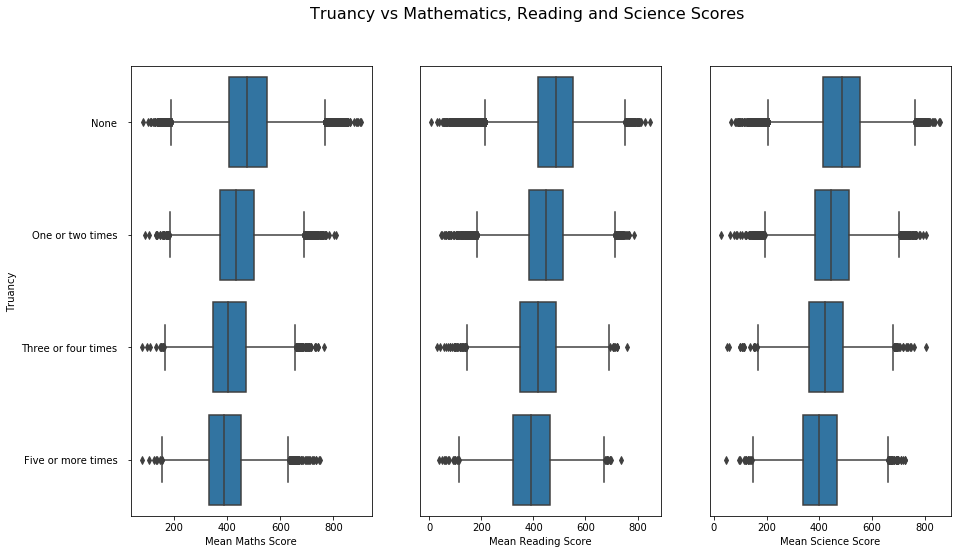

In [8]:
# horizontal boxplot subplots of Truancy vs mean scores - Maths, Science and Reading
# using only single y axis label for all the plots
fig = plt.figure(figsize=[14.70, 8.27])
fig.suptitle('Truancy vs Mathematics, Reading and Science Scores', fontsize=16)

plt.subplot(1,3,1)
sb.boxplot(data=df, y='Truancy', x='Mean_Maths_Score', color = base_colour)
plt.ylabel('Truancy')
plt.xlabel('Mean Maths Score')

plt.subplot(1,3,2)
sb.boxplot(data=df, y='Truancy', x='Mean_Reading_Score', color = base_colour)
plt.ylabel('')
plt.yticks([])
plt.xlabel('Mean Reading Score')

plt.subplot(1,3,3)
sb.boxplot(data=df, y='Truancy', x='Mean_Science_Score', color = base_colour)
plt.ylabel('')
plt.yticks([])
plt.xlabel('Mean Science Score');

## Country vs Mathematics, Reading and Science Scores
We see from this data, students of some countries achieve much higher results than other countries.

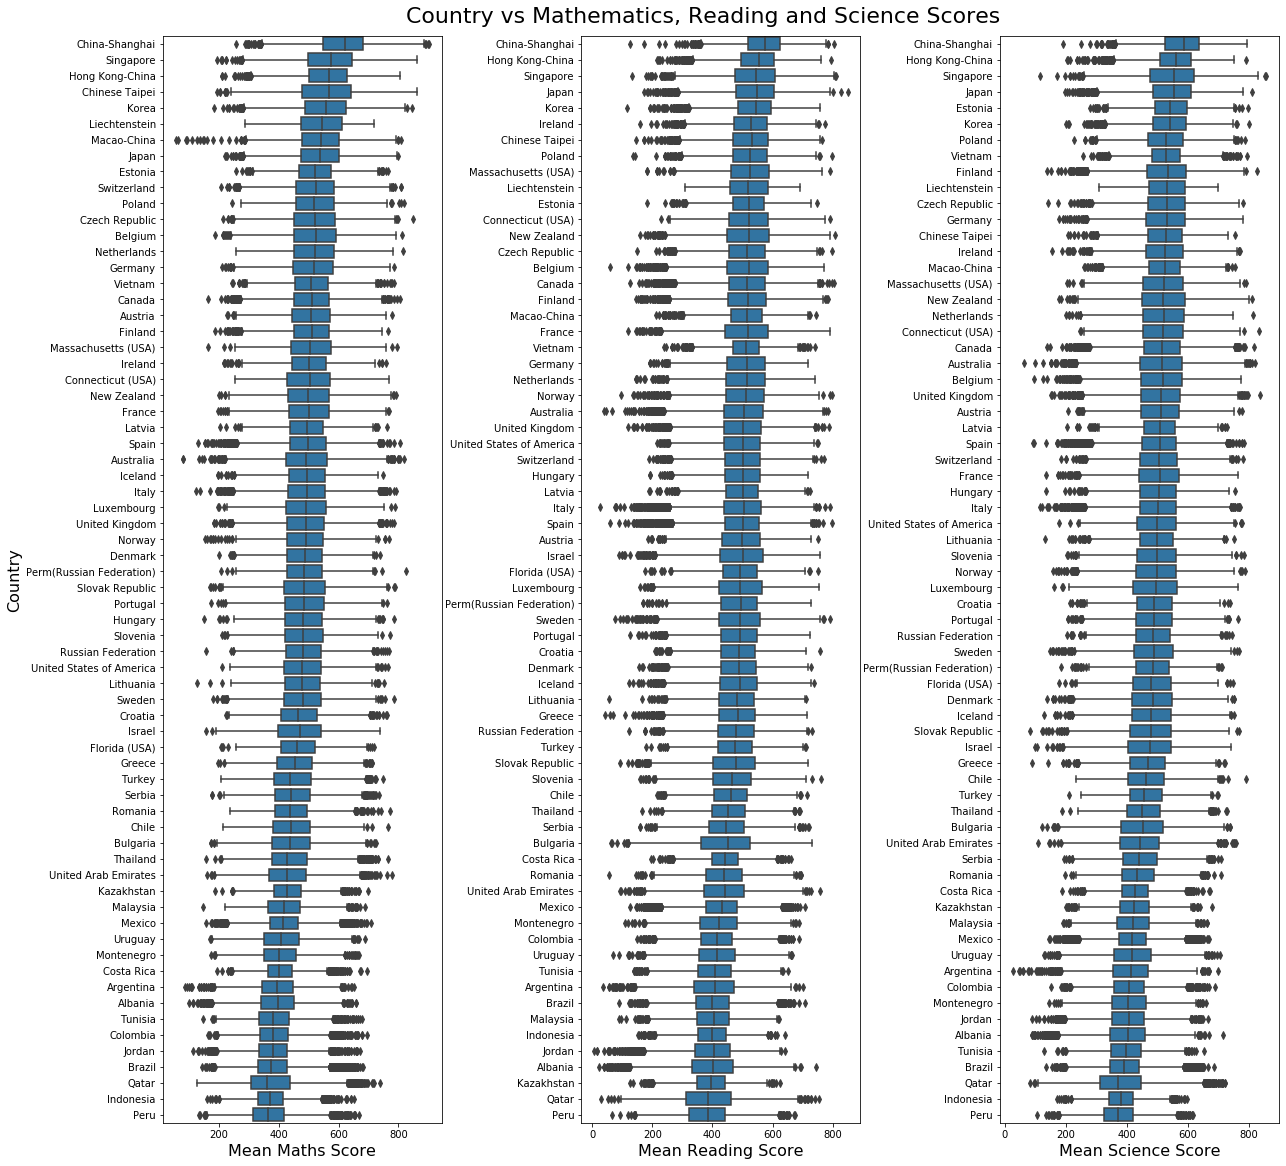

In [68]:
# first set order of country mean scores - maths, science and reading
maths_order = df.groupby('Country')['Mean_Maths_Score'].mean().sort_values(ascending = False).index
reading_order = df.groupby('Country')['Mean_Reading_Score'].mean().sort_values(ascending = False).index
science_order = df.groupby('Country')['Mean_Science_Score'].mean().sort_values(ascending = False).index

fig = plt.figure(figsize = [20, 20])
fig.suptitle('Country vs Mathematics, Reading and Science Scores', fontsize=22, y=.9)
plt.subplots_adjust(wspace = 0.5)

plt.subplot(1,3,1)
sb.boxplot(data=df, x='Mean_Maths_Score', y='Country', color = base_colour, order = maths_order)
plt.ylabel('Country', fontsize = 16)
plt.xlabel('Mean Maths Score', fontsize = 16)

plt.subplot(1,3,2)
sb.boxplot(data=df, x='Mean_Reading_Score', y='Country', color = base_colour, order = reading_order)
plt.ylabel('')
plt.xlabel('Mean Reading Score', fontsize = 16)

plt.subplot(1,3,3)
sb.boxplot(data=df, x='Mean_Science_Score', y='Country',  color = base_colour, order = science_order)
plt.ylabel('')
plt.xlabel('Mean Science Score', fontsize = 16);




## Wealth Index vs Mathematics, Reading and Science Scores
We see from the these plots that there is indeed a clear positive correlation of wealth on student scores. As the three subjects largely exhibit near identical appearances in relation to distribution and correlations (seen by the regression lines) of wealth and student’s scores, I will focus on a single subject (mathematics) in large part for the rest for my presentation, where wealth and student scores are being considered.

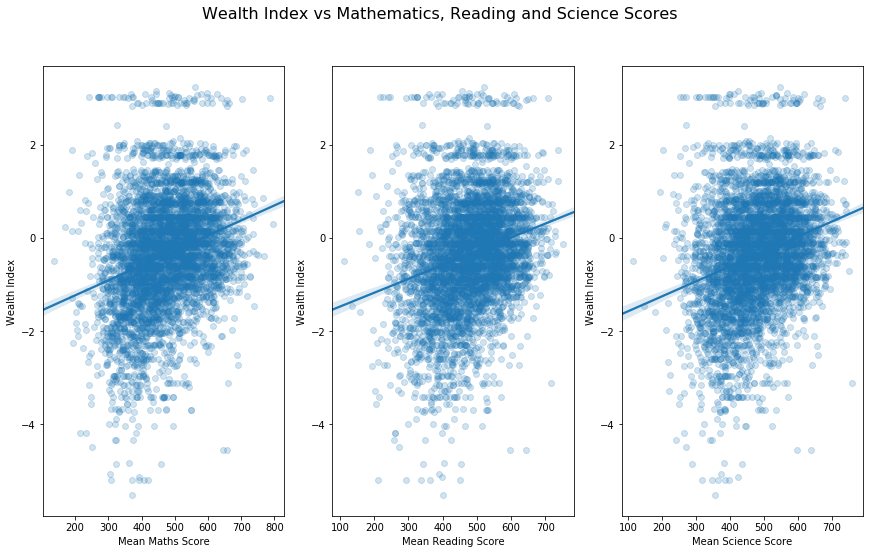

In [10]:
# scatter plot (with regression line) of all three mean scores against wealth index,
# sampling 5000 students so that plots are clearer and they render faster

samples = np.random.choice(df.shape[0], 5000, replace = False)
student_samp = df.loc[samples,:]

fig = plt.figure(figsize=[14.70, 8.27])
fig.suptitle('Wealth Index vs Mathematics, Reading and Science Scores', fontsize=16)

plt.subplot(1,3,1)
sb.regplot(data=student_samp, x='Mean_Maths_Score', y='Wealth', scatter_kws = {'alpha':1/5})
plt.ylabel('Wealth Index')
plt.xlabel('Mean Maths Score')

plt.subplot(1,3,2)
sb.regplot(data=student_samp, x='Mean_Reading_Score', y='Wealth', scatter_kws = {'alpha':1/5})
plt.ylabel('Wealth Index')
plt.xlabel('Mean Reading Score')

plt.subplot(1,3,3)
sb.regplot(data=student_samp, x='Mean_Science_Score', y='Wealth', scatter_kws = {'alpha':1/5})
plt.ylabel('Wealth Index')
plt.xlabel('Mean Science Score');

## Country Position - Wealth Index vs  Mean Mathematics Score
The most interesting positions of the countries in this plot, are those that fall in the two highlighted quadrants (above average wealth and below average maths scores, and below average wealth and above average maths scores). In particular the countries which deviate most from the correlated values. Here we find one of the least wealthy countries Vietnam, whose students have above average maths scores. Hong Kong, China and Korea also follow the same trend of below average wealth and above average maths scores. Qatar on the other hand has the complete opposite effect, having the unenviable position of having one of the lowest average maths scores, though it is one of the wealthiest countries in the world.

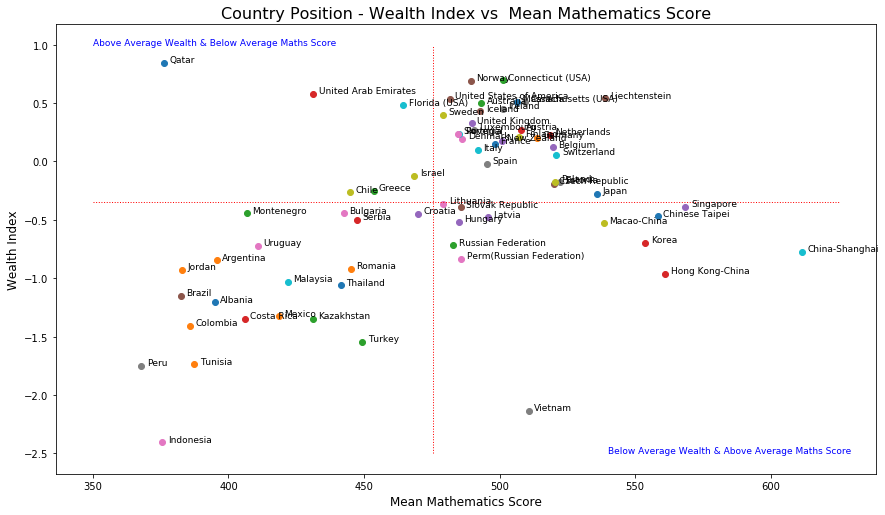

In [11]:
# construct df of countries, grouped by their mean maths score and wealth 
df_group = df.groupby('Country')['Mean_Maths_Score', 'Wealth'].mean()

fig, ax = plt.subplots()
fig.set_size_inches(14.70, 8.27)

# scatter plot of mean maths score vs mean wealth score for each country - 
# annotating each point with the country name, using plt.text()
for i,country in enumerate(df_group.index):
    x= df_group.Mean_Maths_Score[i]
    y= df_group.Wealth[i]
    plt.scatter(x,y)
    plt.text(x+2, y+0.005, country, fontsize=9)

# add crosshairs to chart: overall mean maths score as a vertical line, and overall mean
# wealth index as a horizontal line 
plt.plot([df_group['Mean_Maths_Score'].mean(),df_group['Mean_Maths_Score'].mean()],[-2.5,1],'r-',linestyle = ":",  lw=1)
plt.plot([350,625],[df_group['Wealth'].mean(),df_group['Wealth'].mean()],'r-', linestyle = ":", lw=1)

ax.set_title("Country Position - Wealth Index vs  Mean Mathematics Score", fontsize = 16)
ax.set_xlabel("Mean Mathematics Score", fontsize = 12)
ax.set_ylabel("Wealth Index", fontsize = 12)

# add text to highlight quadrants where values fall in positions contrary to expectation
ax.text(350,1,"Above Average Wealth & Below Average Maths Score",color="blue",size="9")
ax.text(540,-2.5,"Below Average Wealth & Above Average Maths Score",color="blue",size="9")

plt.show();

## OECD Membership Status vs Maths Score and Wealth Index
From the heatmap, we can see a strong correlation of OECD membership and wealth, which proves that on average OECD member countries are indeed richer than non-members. We also find the expected positive correlation between wealth and maths scores.

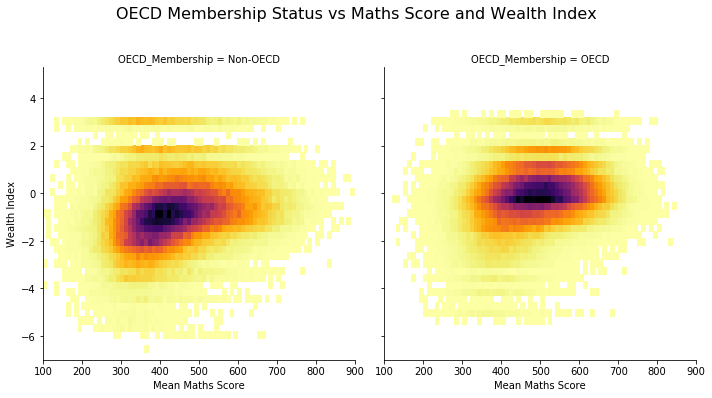

In [12]:
# create heat maps with seaborn's PairGrid.
def hist2dgrid(x, y, **kwargs):
    palette = kwargs.pop('color')
    bins_x = np.arange(100, 900+10, 10)
    bins_y = np.arange(-7, 5+.3, 0.3)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

    # create faceted heat maps on country OECD status vs mean maths score and wealth, 
# with results depicted horiztontally


g = sb.FacetGrid(data = df, col = 'OECD_Membership', col_wrap = 2, height = 5)
      
g.map(hist2dgrid, 'Mean_Maths_Score', 'Wealth', color = 'inferno_r')
g.set_xlabels('Mean Maths Score')
g.set_ylabels('Wealth Index')
g.fig.suptitle('OECD Membership Status vs Maths Score and Wealth Index', fontsize = 16, y = 1.1) 
plt.show()

## Country vs Mathematics, Reading and Science Scores and Gender
Jordan is found to have a greater number of female students which do better than male students not only in reading as expected, but also in mathematics and science too. United Arab Emirates, Thailand and Qatar also follow the same trend. However, it should be noted, that all these country scores are well below the average scores of mathematics and science. This result may also explain the result found earlier (from the facet grid of OECD vs gender and mean scores), that male students may benefit slightly more from OECD membership. A few non-member OECD countries maybe bringing down the male student average scores.


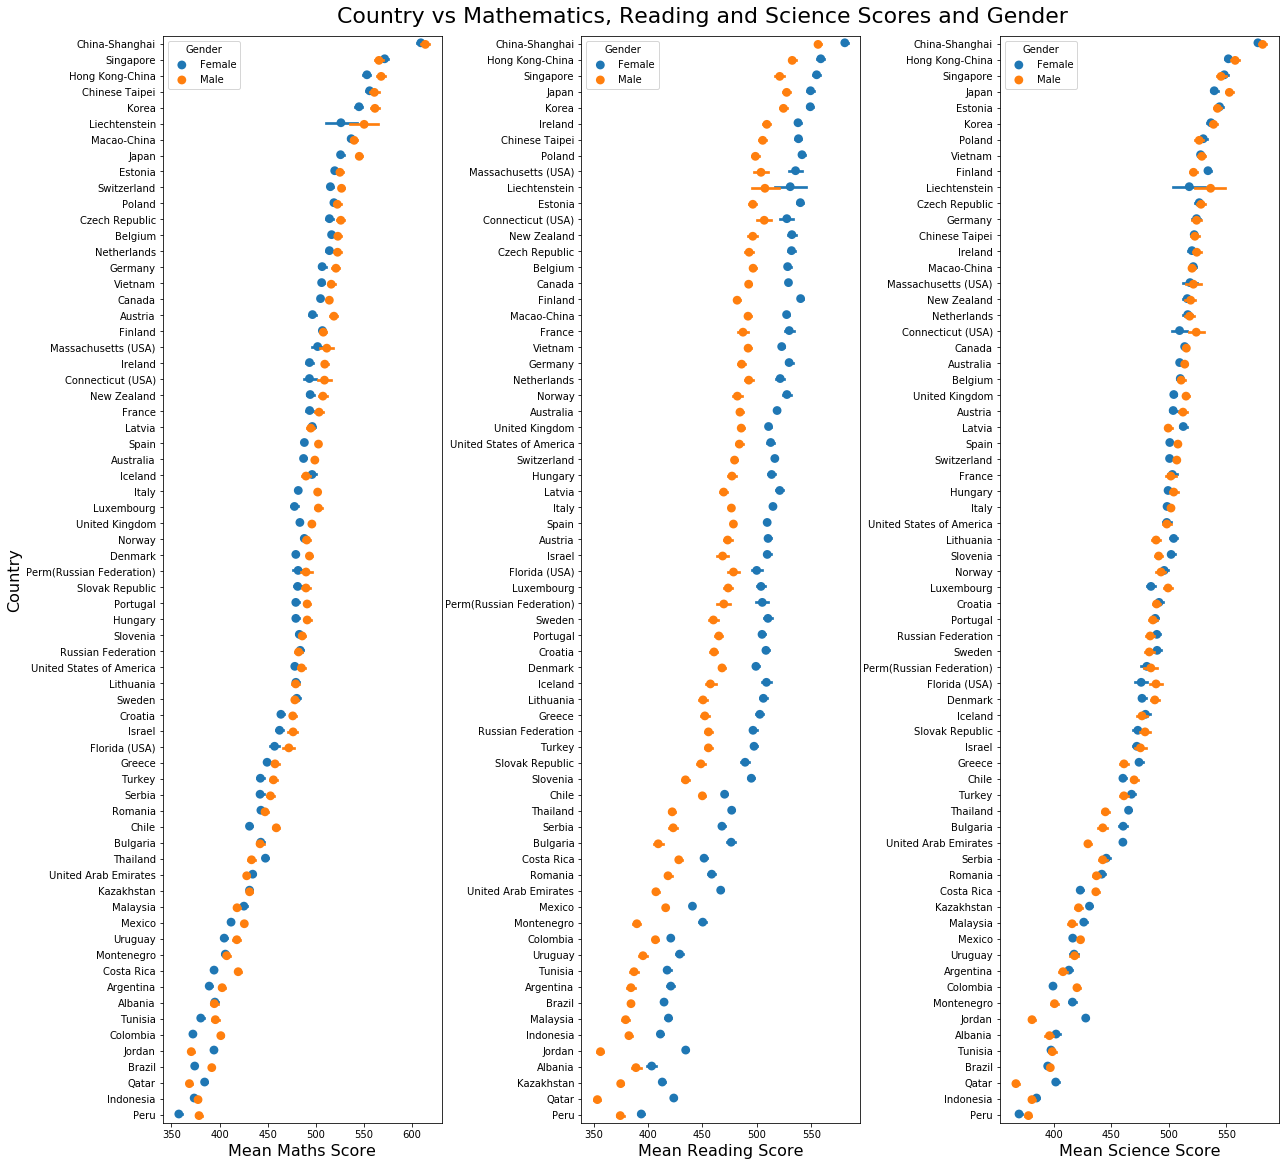

In [69]:
# using pointplot subplots, plot each country against the mean score types, with gender in 'hue' 
# parameter, to highlight differences of student gender for each country

fig = plt.figure(figsize = [20, 20])
fig.suptitle('Country vs Mathematics, Reading and Science Scores and Gender', fontsize=22, y=.9)
plt.subplots_adjust(wspace = 0.5)

plt.subplot(1,3,1)
ax = sb.pointplot(data = df, x= 'Mean_Maths_Score', y = 'Country', hue = 'Gender', dodge = 0.1,
                  linestyles = "", order = maths_order)
plt.ylabel('Country', fontsize = 16)
plt.xlabel('Mean Maths Score', fontsize = 16)

plt.subplot(1,3,2)
ax = sb.pointplot(data = df, x= 'Mean_Reading_Score', y = 'Country', hue = 'Gender', dodge = 0.1,
                  linestyles = "", order = reading_order)
plt.ylabel('')
plt.xlabel('Mean Reading Score', fontsize = 16)

plt.subplot(1,3,3)
ax = sb.pointplot(data = df, x= 'Mean_Science_Score', y = 'Country', hue = 'Gender', dodge = 0.1,
                  linestyles = "", order = science_order)
plt.ylabel('')
plt.xlabel('Mean Science Score', fontsize = 16);

## Students who have Textbooks vs Gender and Mathematics, Reading and Science Scores
We find some interesting results here. There seems to be a correlation of textbook possession, gender of students, and the corresponding score of the three subjects. Female students see a greater increase of scores, compared to male students, in mathematics and science if they have textbooks and male students improve their reading scores more than females if they are in possession of textbooks.

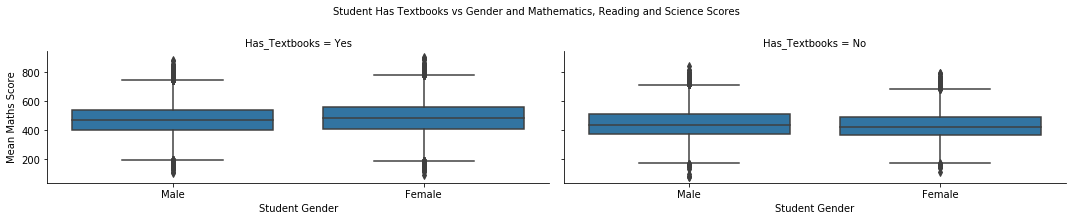

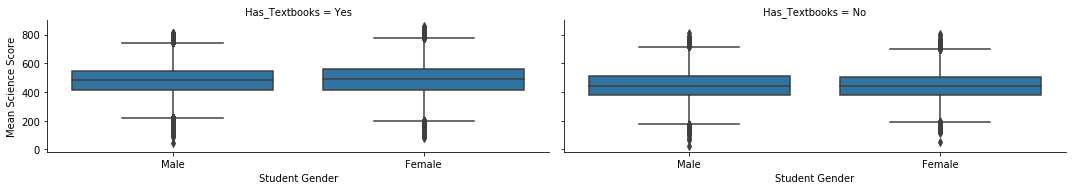

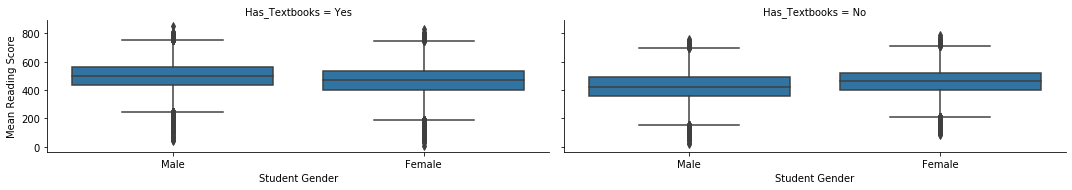

In [80]:
# create FacetGrid boxplots of, gender split of students with/without textbooks, 
# for each of the three mean score types
 
g = sb.FacetGrid(data = df, col = 'Has_Textbooks', height =2.75, aspect = 2.73)
g.fig.suptitle('Student Has Textbooks vs Gender and Mathematics, Reading and Science Scores', fontsize = 10, y = 1.1)
g.map(sb.boxplot, 'Gender', 'Mean_Maths_Score', color = base_colour)
g.set_xlabels('Student Gender')
g.set_ylabels('Mean Maths Score')

g = sb.FacetGrid(data = df, col = 'Has_Textbooks', height =2.75, aspect = 2.73)
g.map(sb.boxplot, 'Gender', 'Mean_Science_Score', color = base_colour)
g.set_xlabels('Student Gender')
g.set_ylabels('Mean Science Score')

g = sb.FacetGrid(data = df, col = 'Has_Textbooks', height =2.75, aspect = 2.73)
g.map(sb.boxplot, 'Gender', 'Mean_Reading_Score', color = base_colour)
g.set_xlabels('Student Gender')
g.set_ylabels('Mean Reading Score');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!